# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
df_tesla.shape

(124, 3)

In [40]:
df_tesla.head()
# df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [22]:
df_unemployment.shape

(181, 3)

In [23]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [24]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')
print('Smallest value for "Unemployment Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100
Smallest value for "Unemployment Benefits" in Web Search: 14


In [25]:
df_unemployment.describe()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181,181.000000,181.000000
mean,2011-07-02 01:51:22.872928256,35.110497,6.217680
min,2004-01-01 00:00:00,14.000000,3.700000
25%,2007-10-01 00:00:00,21.000000,4.700000
50%,2011-07-01 00:00:00,26.000000,5.400000
75%,2015-04-01 00:00:00,45.000000,7.800000
max,2019-01-01 00:00:00,100.000000,10.000000
std,NaN,20.484925,1.891859


### Bitcoin

In [4]:
df_btc_price.shape

(2204, 3)

In [27]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [26]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')
print(f'smallest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].min()}')

largest BTC News Search: 100
smallest BTC News Search: 3


In [28]:
df_btc_search.describe()

,MONTH,BTC_NEWS_SEARCH
count,73,73.000000
mean,2017-08-31 09:32:03.287671296,15.013699
min,2014-09-01 00:00:00,3.000000
25%,2016-03-01 00:00:00,5.000000
50%,2017-09-01 00:00:00,14.000000
75%,2019-03-01 00:00:00,18.000000
max,2020-09-01 00:00:00,100.000000
std,NaN,15.146959


###What do the Search Numbers mean?


We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as:

"Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.

For each word in our search, Google finds how much search volume in each region and time period our term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across our topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell us how many searches occurred for our topic, but it gives us a nice proxy.

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [29]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [19]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [20]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price['VOLUME'].isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found.

In [21]:
df_btc_price.dropna(inplace=True) # The inplace argument allows to overwrite the df

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [9]:
type(df_tesla['MONTH'][0])
type(df_unemployment['MONTH'][0])
type(df_btc_search['MONTH'][0])
type(df_btc_price['DATE'][0])

str

In [10]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [45]:
df_btc_search.MONTH.head()
df_tesla.MONTH.head()
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [30]:
df_btc_monthly = df_btc_price.resample(rule= 'M', on='DATE').last()

<ipython-input-30-0f660a5d187a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample(rule= 'M', on='DATE').last()


In [31]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [33]:
df_btc_monthly.isna().values.any()
df_btc_search.isna().values.any()

False

# Data Visualisation

### Notebook Formatting & Style Helpers

In [12]:
years = mdates.YearLocator()   # Count years
months = mdates.MonthLocator()  # Count months
years_fmt = mdates.DateFormatter('%Y')

In [13]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

Text(0, 0.5, 'Search Trend')

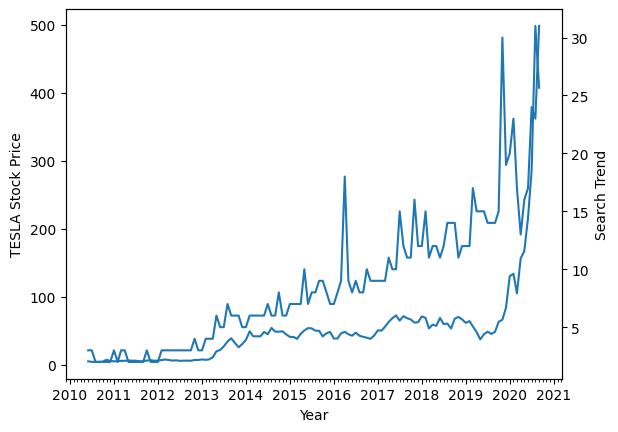

In [14]:
# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


# line graph
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

# setting labels
ax1.set_xlabel('Year')
ax1.set_ylabel('TESLA Stock Price')
ax2.set_ylabel('Search Trend')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'Search Trend')

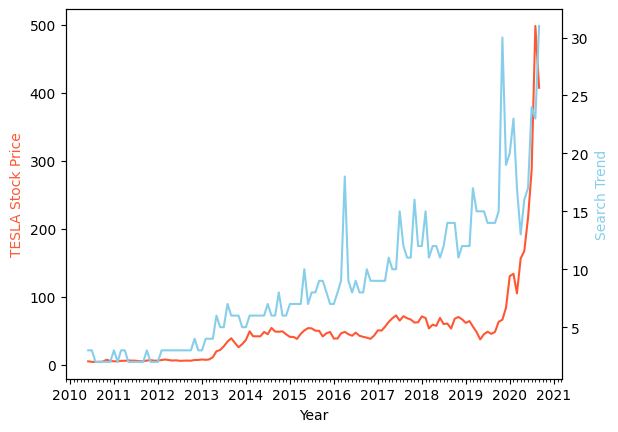

In [16]:
# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# line graph
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#ff5733")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue")

# setting labels
ax1.set_xlabel('Year')
ax1.set_ylabel('TESLA Stock Price', color="#ff5733")
ax2.set_ylabel('Search Trend', color="skyblue")

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

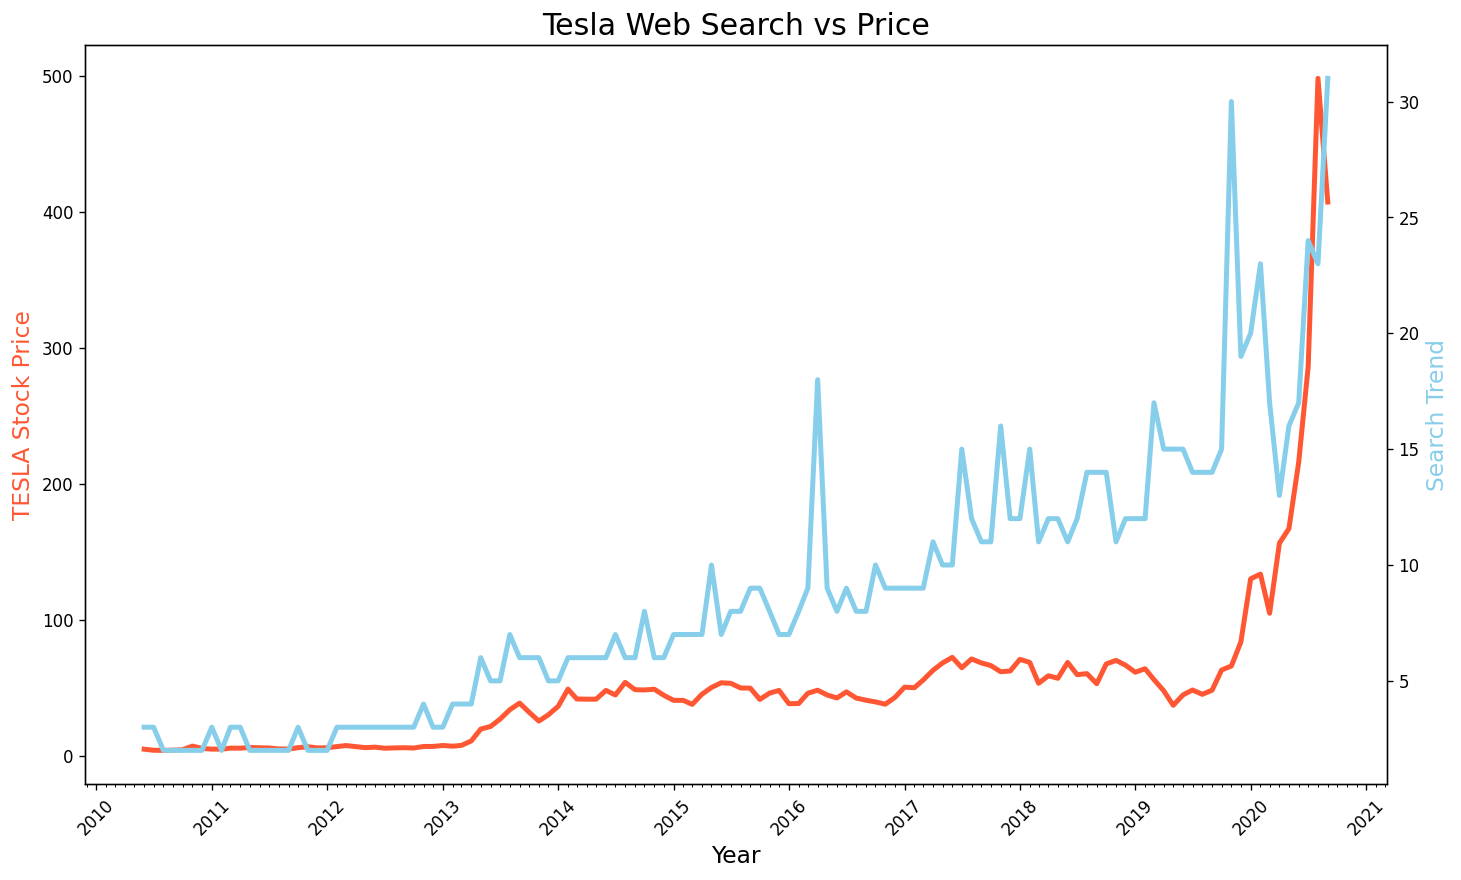

In [17]:
# Figure plot
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(rotation=45)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding tick formatting for days
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# line graph
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, linewidth=3, color="#ff5733")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, linewidth=3, color="skyblue")


# setting labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TESLA Stock Price', fontsize=14, color="#ff5733")
ax2.set_ylabel('Search Trend', fontsize=14, color="skyblue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

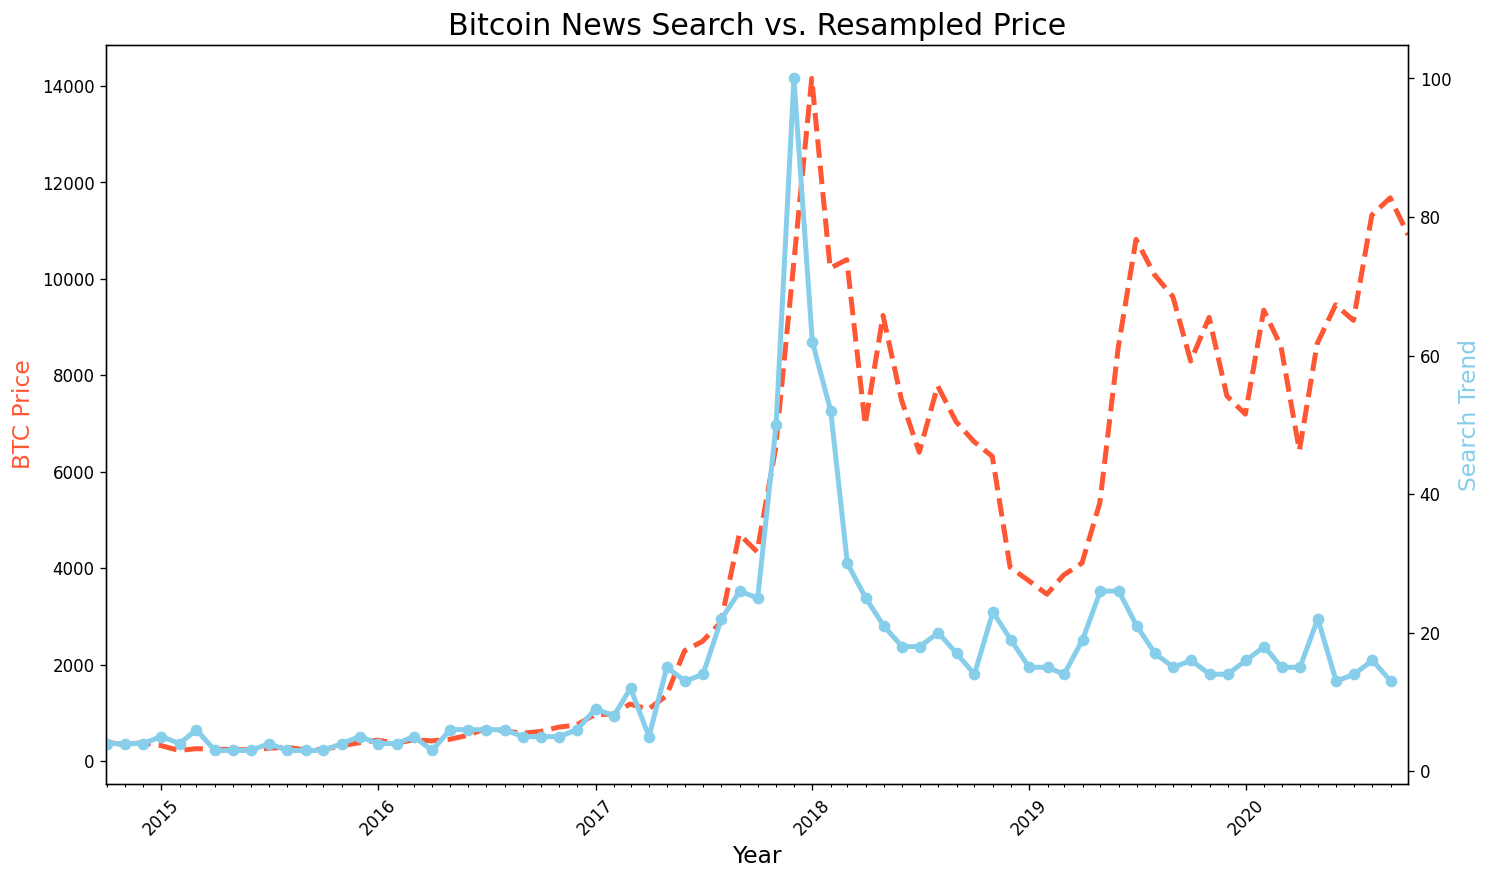

In [42]:
# Figure plot
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(rotation=45)
plt.title('Bitcoin News Search vs. Resampled Price', fontsize=18)

# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding tick formatting for days
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# setting limit
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# line graph
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, linewidth=3, linestyle="--", color="#ff5733")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, linewidth=3, marker="o", color="skyblue")


# setting labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('BTC Price', fontsize=14, color="#ff5733")
ax2.set_ylabel('Search Trend', fontsize=14, color="skyblue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

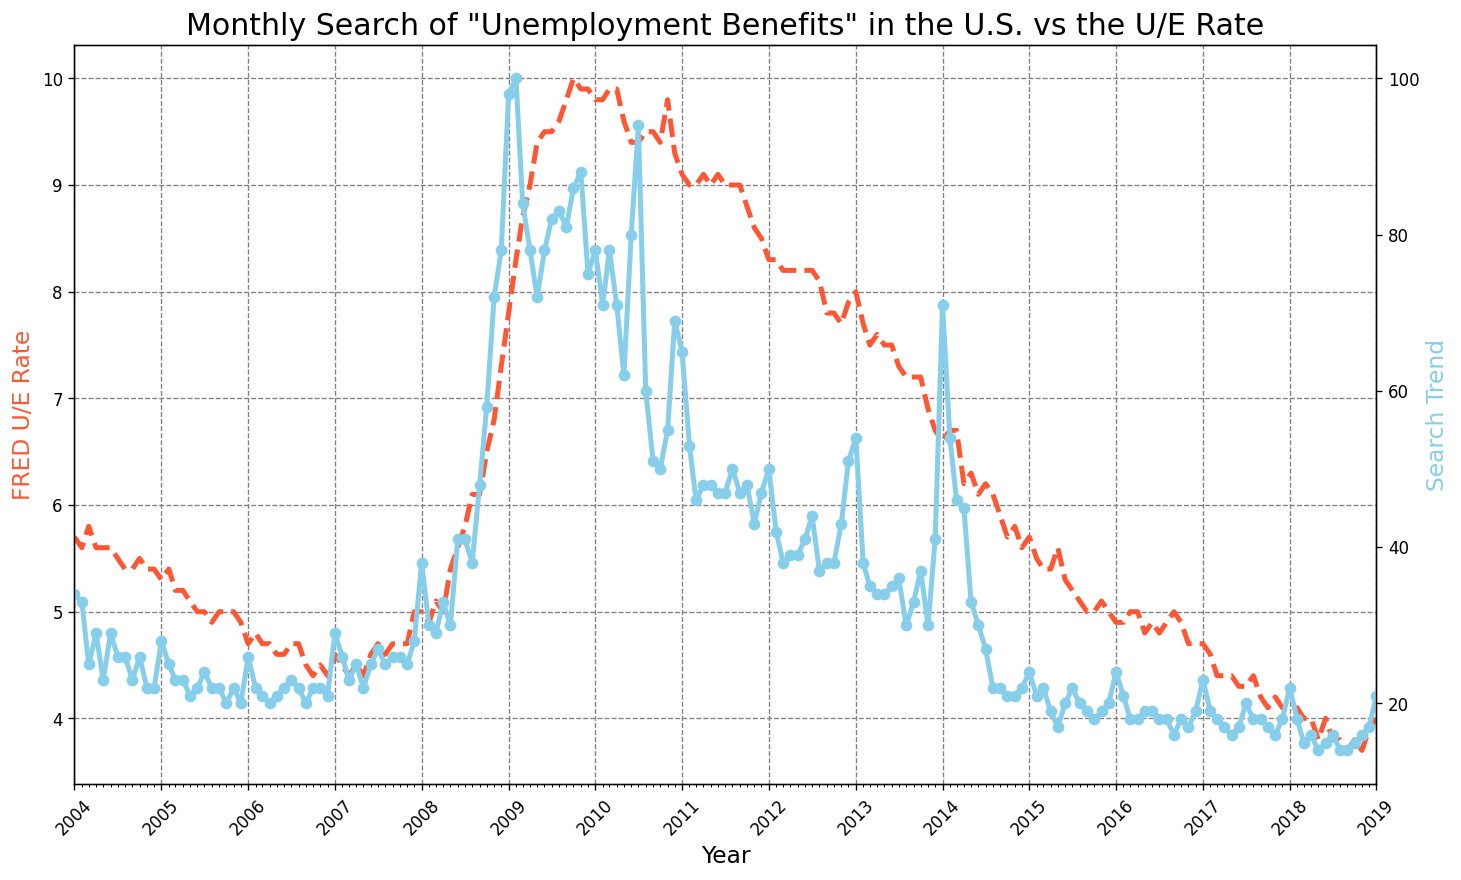

In [46]:
# Figure plot
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding tick formatting for days
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# setting limit
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# set grid
ax1.grid(color='grey', linestyle='--')

# line graph
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, linewidth=3, linestyle="--", color="#ff5733")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, linewidth=3, marker="o", color="skyblue")


# setting labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', fontsize=14, color="#ff5733")
ax2.set_ylabel('Search Trend', fontsize=14, color="skyblue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


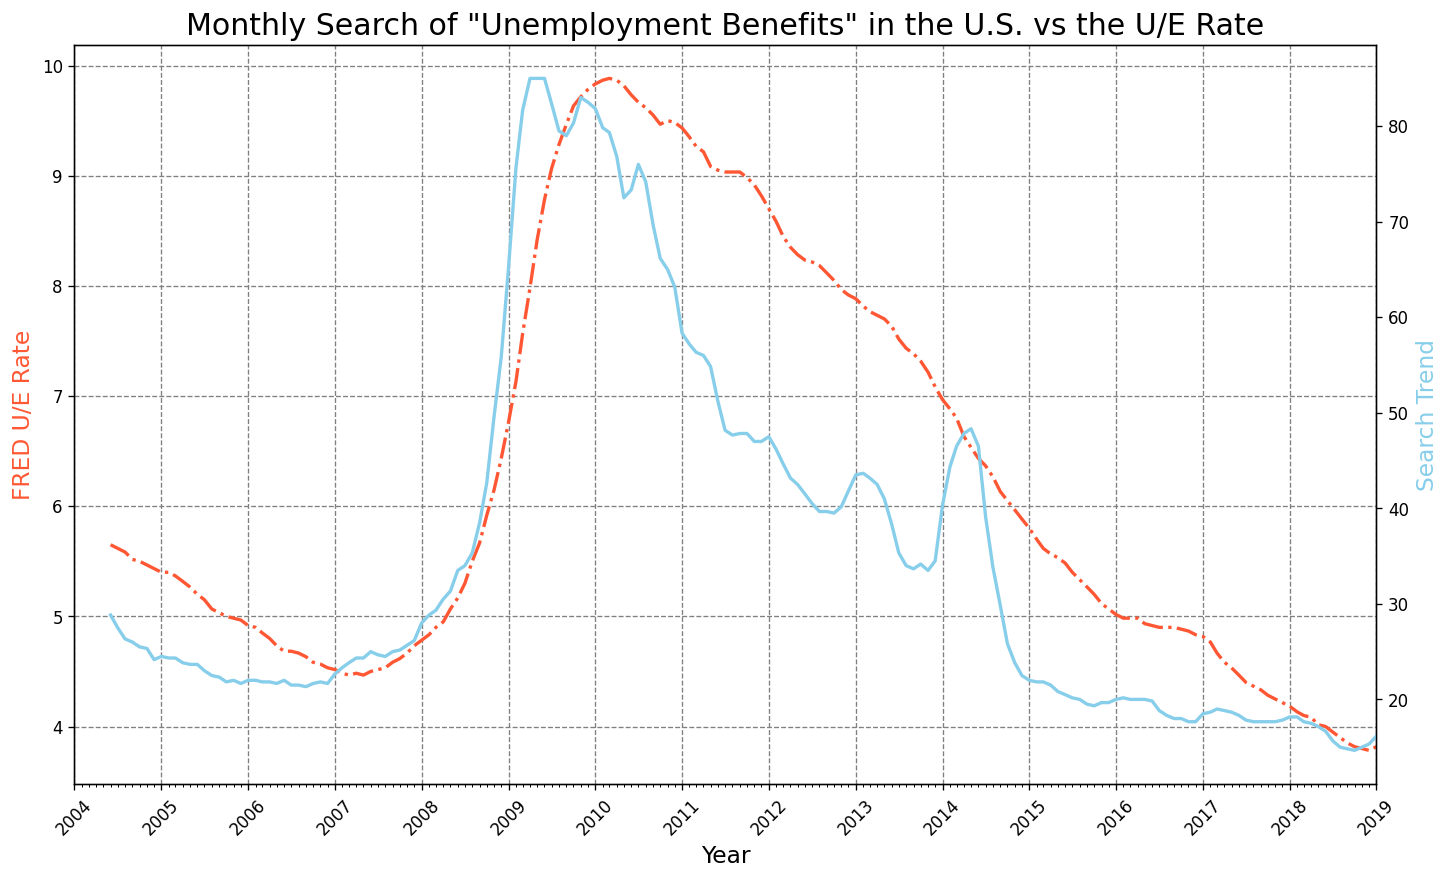

In [52]:
# Figure plot
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding tick formatting for days
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# setting limit
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# set grid
ax1.grid(color='grey', linestyle='--')

# roll_df
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# line graph
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, linewidth=2, linestyle="-.", color="#ff5733")
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, linewidth=2, color="skyblue")


# setting labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', fontsize=14, color="#ff5733")
ax2.set_ylabel('Search Trend', fontsize=14, color="skyblue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [53]:
df_unemployment_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [54]:
df_unemployment_2020['MONTH'] = pd.to_datetime(df_unemployment_2020['MONTH'])
df_unemployment_2020.MONTH.head()

,MONTH
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01


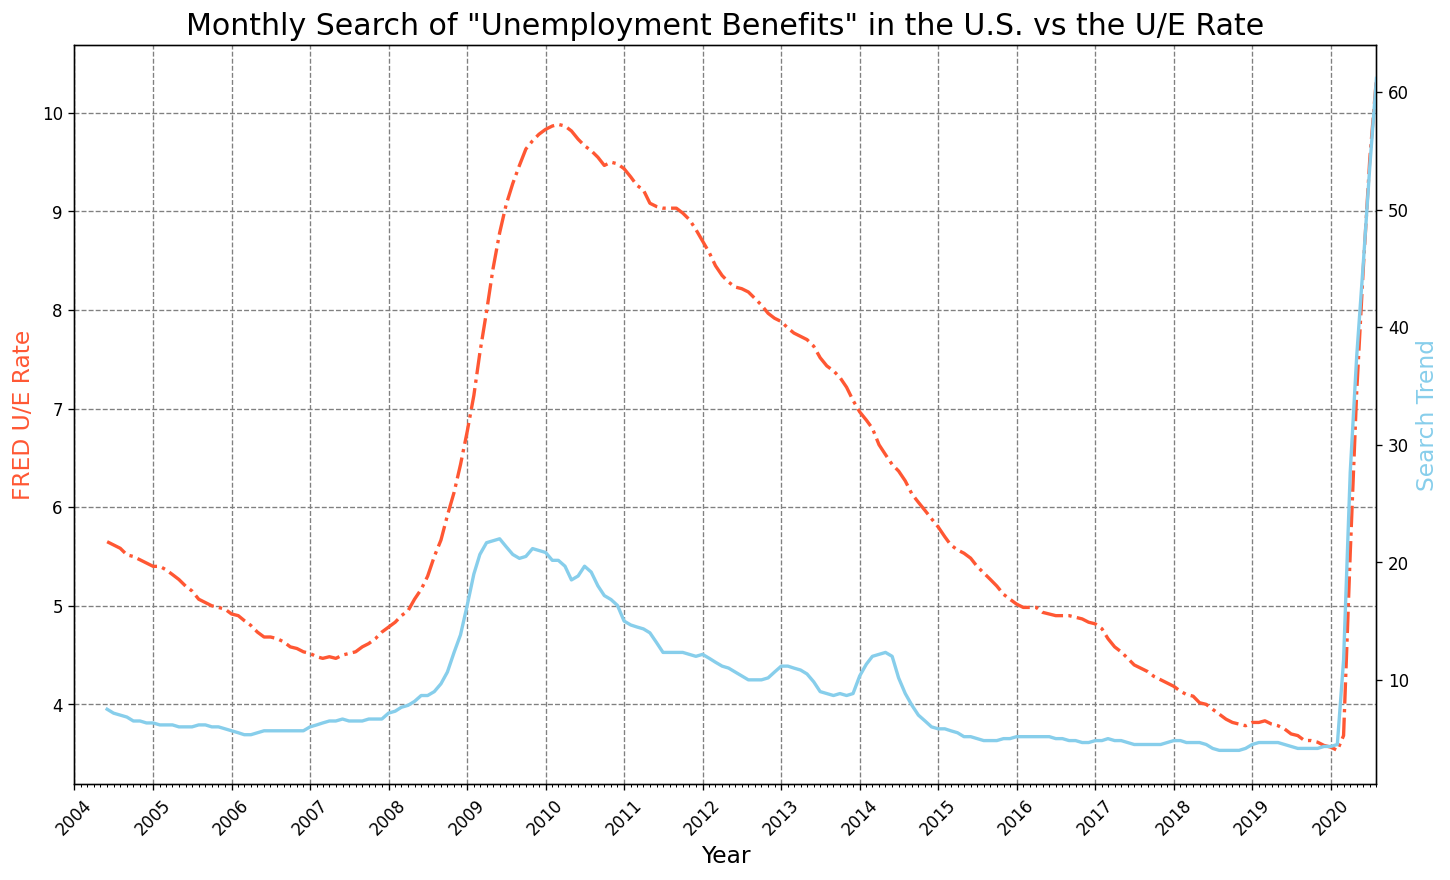

In [57]:
# Figure plot
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Create locators for ticks on the time axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding tick formatting for days
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# setting limit
ax1.set_xlim([df_unemployment_2020.MONTH.min(), df_unemployment_2020.MONTH.max()])

# set grid
ax1.grid(color='grey', linestyle='--')

# roll_df
roll_df_2020 = df_unemployment_2020[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# line graph
ax1.plot(df_unemployment_2020.MONTH, roll_df_2020.UNRATE, linewidth=2, linestyle="-.", color="#ff5733")
ax2.plot(df_unemployment_2020.MONTH, roll_df_2020.UE_BENEFITS_WEB_SEARCH, linewidth=2, color="skyblue")


# setting labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', fontsize=14, color="#ff5733")
ax2.set_ylabel('Search Trend', fontsize=14, color="skyblue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

plt.show()